In [163]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [164]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [165]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [166]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [167]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

0

In [168]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [169]:
# Starting URL for Weather Map API Call.
url = "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
print(url)

api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855


In [170]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Boston


In [174]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

MissingSchema: Invalid URL 'api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Boston': No scheme supplied. Perhaps you meant http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Boston?

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

MissingSchema: Invalid URL 'api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Bston': No scheme supplied. Perhaps you meant http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Bston?

In [189]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

MissingSchema: Invalid URL 'api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Boston': No scheme supplied. Perhaps you meant http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=f4efd3200dd79667dd9f8b465aff0855&q=Boston?

In [172]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":741,"main":"Fog","description":"fog","icon":"50n"},{"id":601,"main":"Snow","description":"snow","icon":"13n"}],"base":"stations","main":{"temp":32.31,"feels_like":25.93,"temp_min":30,"temp_max":34.11,"pressure":1014,"humidity":91},"visibility":805,"wind":{"speed":6.91,"deg":360},"snow":{"1h":1.54},"clouds":{"all":100},"dt":1646872764,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1646823996,"sunset":1646865790},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [ ]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'},
  {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 32.31,
  'feels_like': 25.93,
  'temp_min': 30,
  'temp_max': 34.11,
  'pressure': 1014,
  'humidity': 91},
 'visibility': 805,
 'wind': {'speed': 6.91, 'deg': 360},
 'snow': {'1h': 1.54},
 'clouds': {'all': 100},
 'dt': 1646872764,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1646823996,
  'sunset': 1646865790},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [ ]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f4efd3200dd79667dd9f8b465aff0855&q=Bston


In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'},
  {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 32.31,
  'feels_like': 25.93,
  'temp_min': 30,
  'temp_max': 34.11,
  'pressure': 1014,
  'humidity': 91},
 'visibility': 805,
 'wind': {'speed': 6.91, 'deg': 360},
 'snow': {'1h': 1.54},
 'clouds': {'all': 100},
 'dt': 1646872764,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1646823996,
  'sunset': 1646865790},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [ ]:
# Get the JSON data.
boston_data = city_weather.json()

In [ ]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1646823996,
 'sunset': 1646865790}

In [190]:
boston_data["sys"]["country"]

'US'

In [191]:
boston_data["dt"]

1646872764

In [ ]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 34.11 91 100 6.91


In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 3, 10, 0, 39, 24)

In [ ]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-10 00:39:24'

In [ ]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [ ]:
import pandas as pd
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

""


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [192]:

# Import time module
import time

# Get today's date in seconds.
today = time.strftime("%x")
today




'03/10/22'

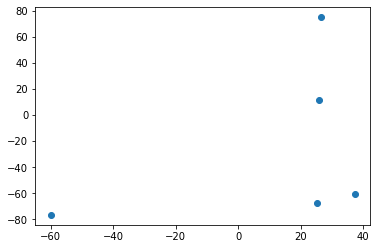

In [193]:
import matplotlib.pyplot as plt

plt.scatter(x,y)